In [2]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
from sklearn.model_selection import learning_curve

In [3]:
#storing and load dataset
data = r"C:\Users\HAMMAD\OneDrive\Desktop\climate-ds.csv"
#reading dataset
df = pd.read_csv(data, index_col=['Unnamed: 0'])
#showing 10 rows of dataset
df.head(15)


Area         Item  Year  average_rain_fall_mm_per_year  \
0   Albania        Maize  1990                           1485   
1   Albania     Potatoes  1990                           1485   
2   Albania  Rice, paddy  1990                           1485   
3   Albania      Sorghum  1990                           1485   
4   Albania     Soybeans  1990                           1485   
5   Albania        Wheat  1990                           1485   
6   Albania        Maize  1991                           1485   
7   Albania     Potatoes  1991                           1485   
8   Albania  Rice, paddy  1991                           1485   
9   Albania      Sorghum  1991                           1485   
10  Albania     Soybeans  1991                           1485   
11  Albania        Wheat  1991                           1485   
12  Albania        Maize  1992                           1485   
13  Albania     Potatoes  1992                           1485   
14  Albania  Rice, paddy  1992                           1485   

    pesticides_tonnes  avg_temp  hg/ha_yield  
0              121.00     16.37        36613  
1              121.00     16.37        66667  
2              121.00     16.37        23333  
3              121.00     16.37        12500  
4              121.00     16.37         7000  
5              121.00     16.37        30197  
6              121.00     15.36        29068  
7              121.00     15.36        77818  
8              121.00     15.36        28538  
9              121.00     15.36         6667  
10             121.00     15.36         6066  
11             121.00     15.36        20698  
12             121.00     16.06        24876  
13             121.00     16.06        82920  
14             121.00     16.06        40000

In [4]:
rows , columns = df.shape
#showing total rows and columns
print('There are {} rows and {} columns.'.format(rows,columns))

There are 28242 rows and 7 columns.


In [5]:
#showing information about dataset(headers),total rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [6]:
#showing min max and std,mean
df.describe()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
count 28242.00                       28242.00           28242.00  28242.00   
mean   2001.54                        1149.06           37076.91     20.54   
std       7.05                         709.81           59958.78      6.31   
min    1990.00                          51.00               0.04      1.30   
25%    1995.00                         593.00            1702.00     16.70   
50%    2001.00                        1083.00           17529.44     21.51   
75%    2008.00                        1668.00           48687.88     26.00   
max    2013.00                        3240.00          367778.00     30.65   

       hg/ha_yield  
count     28242.00  
mean      77053.33  
std       84956.61  
min          50.00  
25%       19919.25  
50%       38295.00  
75%      104676.75  
max      501412.00

In [7]:
#drop all null values in a data for cleaning purpose
df.drop_duplicates()

Area            Item  Year  average_rain_fall_mm_per_year  \
0       Albania           Maize  1990                           1485   
1       Albania        Potatoes  1990                           1485   
2       Albania     Rice, paddy  1990                           1485   
3       Albania         Sorghum  1990                           1485   
4       Albania        Soybeans  1990                           1485   
...         ...             ...   ...                            ...   
28237  Zimbabwe     Rice, paddy  2013                            657   
28238  Zimbabwe         Sorghum  2013                            657   
28239  Zimbabwe        Soybeans  2013                            657   
28240  Zimbabwe  Sweet potatoes  2013                            657   
28241  Zimbabwe           Wheat  2013                            657   

       pesticides_tonnes  avg_temp  hg/ha_yield  
0                 121.00     16.37        36613  
1                 121.00     16.37        66667  
2                 121.00     16.37        23333  
3                 121.00     16.37        12500  
4                 121.00     16.37         7000  
...                  ...       ...          ...  
28237            2550.07     19.76        22581  
28238            2550.07     19.76         3066  
28239            2550.07     19.76        13142  
28240            2550.07     19.76        22222  
28241            2550.07     19.76        22888  

[25932 rows x 7 columns]

In [8]:
#count the number of missing values (null values) in each column of a DataFrame
df.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [9]:
#calculate the count of each unique value in the "Item" column of a DataFrame
df["Item"].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [10]:
# Filtering and sorting for "Potatoes"
df0 = df.loc[df["Item"] == "Potatoes"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Maize"
df1 = df.loc[df["Item"] == "Maize"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Wheat"
df2 = df.loc[df["Item"] == "Wheat"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Rice, paddy"
df3 = df.loc[df["Item"] == "Rice, paddy"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Soybeans"
df4 = df.loc[df["Item"] == "Soybeans"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Sorghum"
df5 = df.loc[df["Item"] == "Sorghum"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Sweet potatoes"
df6 = df.loc[df["Item"] == "Sweet potatoes"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Cassava"
df7 = df.loc[df["Item"] == "Cassava"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Yams"
df8 = df.loc[df["Item"] == "Yams"].sort_values("average_rain_fall_mm_per_year")

# Filtering and sorting for "Plantains and others"
df9 = df.loc[df["Item"] == "Plantains and others"].sort_values("average_rain_fall_mm_per_year")


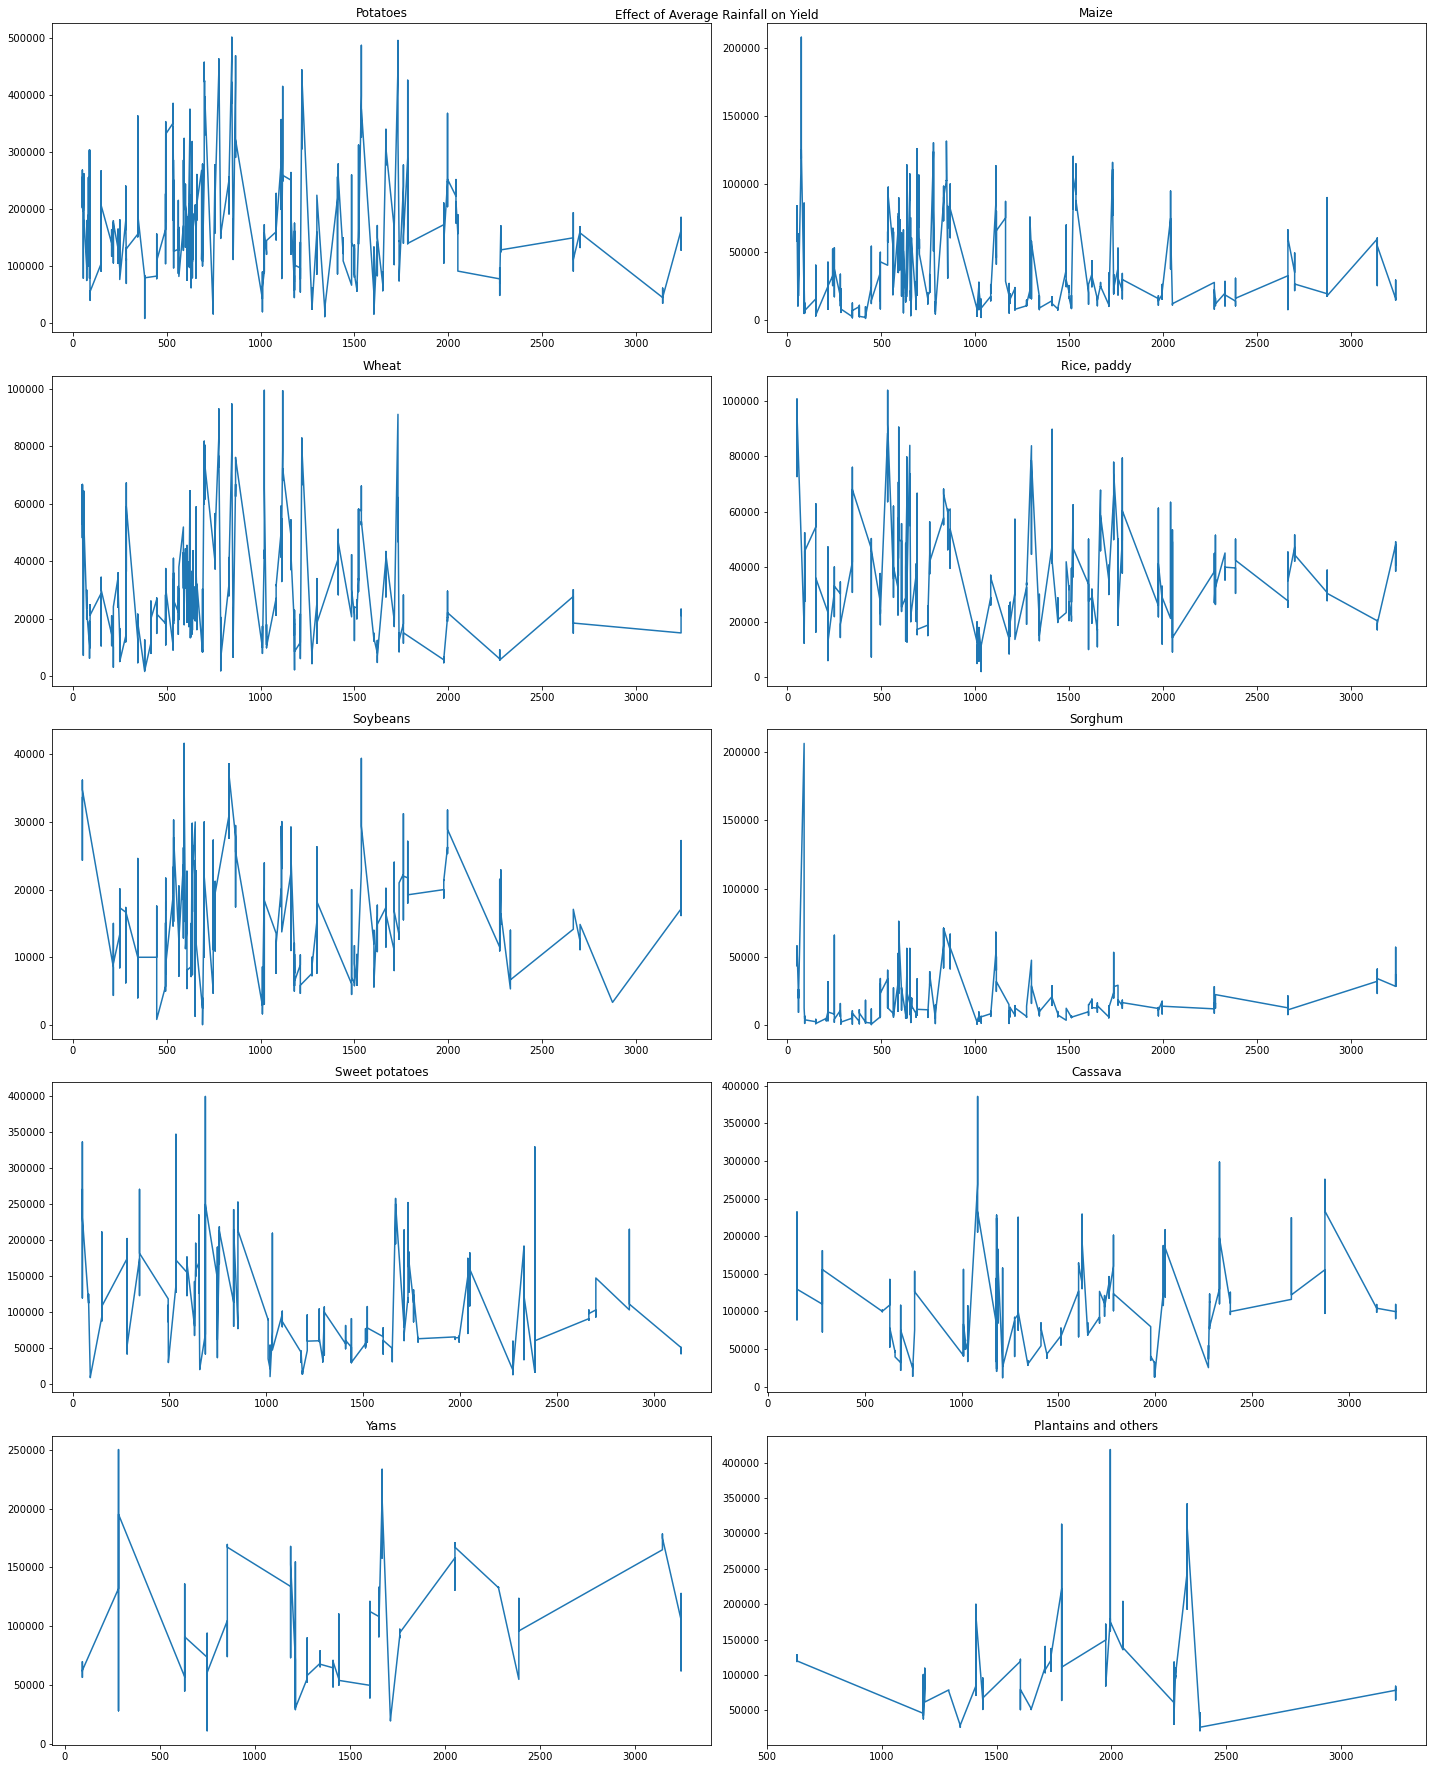

In [11]:
figure, axis = plt.subplots(5, 2, figsize=(20, 25))   # change the values as per your requirements
figure.suptitle('Effect of Average Rainfall on Yield')

# Plotting and setting the title for the first subplot (row 0, column 0)
axis[0, 0].plot(df0["average_rain_fall_mm_per_year"], df0["hg/ha_yield"])
axis[0, 0].set_title('Potatoes')

# Plotting and setting the title for the second subplot (row 0, column 1)
axis[0, 1].plot(df1["average_rain_fall_mm_per_year"], df1["hg/ha_yield"])
axis[0, 1].set_title('Maize')

# Plotting and setting the title for the third subplot (row 1, column 0)
axis[1, 0].plot(df2["average_rain_fall_mm_per_year"], df2["hg/ha_yield"])
axis[1, 0].set_title('Wheat')

# Plotting and setting the title for the fourth subplot (row 1, column 1)
axis[1, 1].plot(df3["average_rain_fall_mm_per_year"], df3["hg/ha_yield"])
axis[1, 1].set_title('Rice, paddy')

# Plotting and setting the title for the fifth subplot (row 2, column 0)
axis[2, 0].plot(df4["average_rain_fall_mm_per_year"], df4["hg/ha_yield"])
axis[2, 0].set_title('Soybeans')

# Plotting and setting the title for the sixth subplot (row 2, column 1)
axis[2, 1].plot(df5["average_rain_fall_mm_per_year"], df5["hg/ha_yield"])
axis[2, 1].set_title('Sorghum')

# Plotting and setting the title for the seventh subplot (row 3, column 0)
axis[3, 0].plot(df6["average_rain_fall_mm_per_year"], df6["hg/ha_yield"])
axis[3, 0].set_title('Sweet potatoes')

# Plotting and setting the title for the eighth subplot (row 3, column 1)
axis[3, 1].plot(df7["average_rain_fall_mm_per_year"], df7["hg/ha_yield"])
axis[3, 1].set_title('Cassava')

# Plotting and setting the title for the ninth subplot (row 4, column 0)
axis[4, 0].plot(df8["average_rain_fall_mm_per_year"], df8["hg/ha_yield"])
axis[4, 0].set_title('Yams')

# Plotting and setting the title for the tenth subplot (row 4, column 1)
axis[4, 1].plot(df9["average_rain_fall_mm_per_year"], df9["hg/ha_yield"])
axis[4, 1].set_title('Plantains and others')

# Adjusting the layout of the subplots to avoid overlapping
plt.tight_layout()
plt.show()

In [12]:
# Sorting DataFrame df0 by "avg_temp"
df0.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df1 by "avg_temp"
df1.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df2 by "avg_temp"
df2.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df3 by "avg_temp"
df3.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df4 by "avg_temp"
df4.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df5 by "avg_temp"
df5.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df6 by "avg_temp"
df6.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df7 by "avg_temp"
df7.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df8 by "avg_temp"
df8.sort_values("avg_temp", inplace=True)

# Sorting DataFrame df9 by "avg_temp"
df9.sort_values("avg_temp", inplace=True)


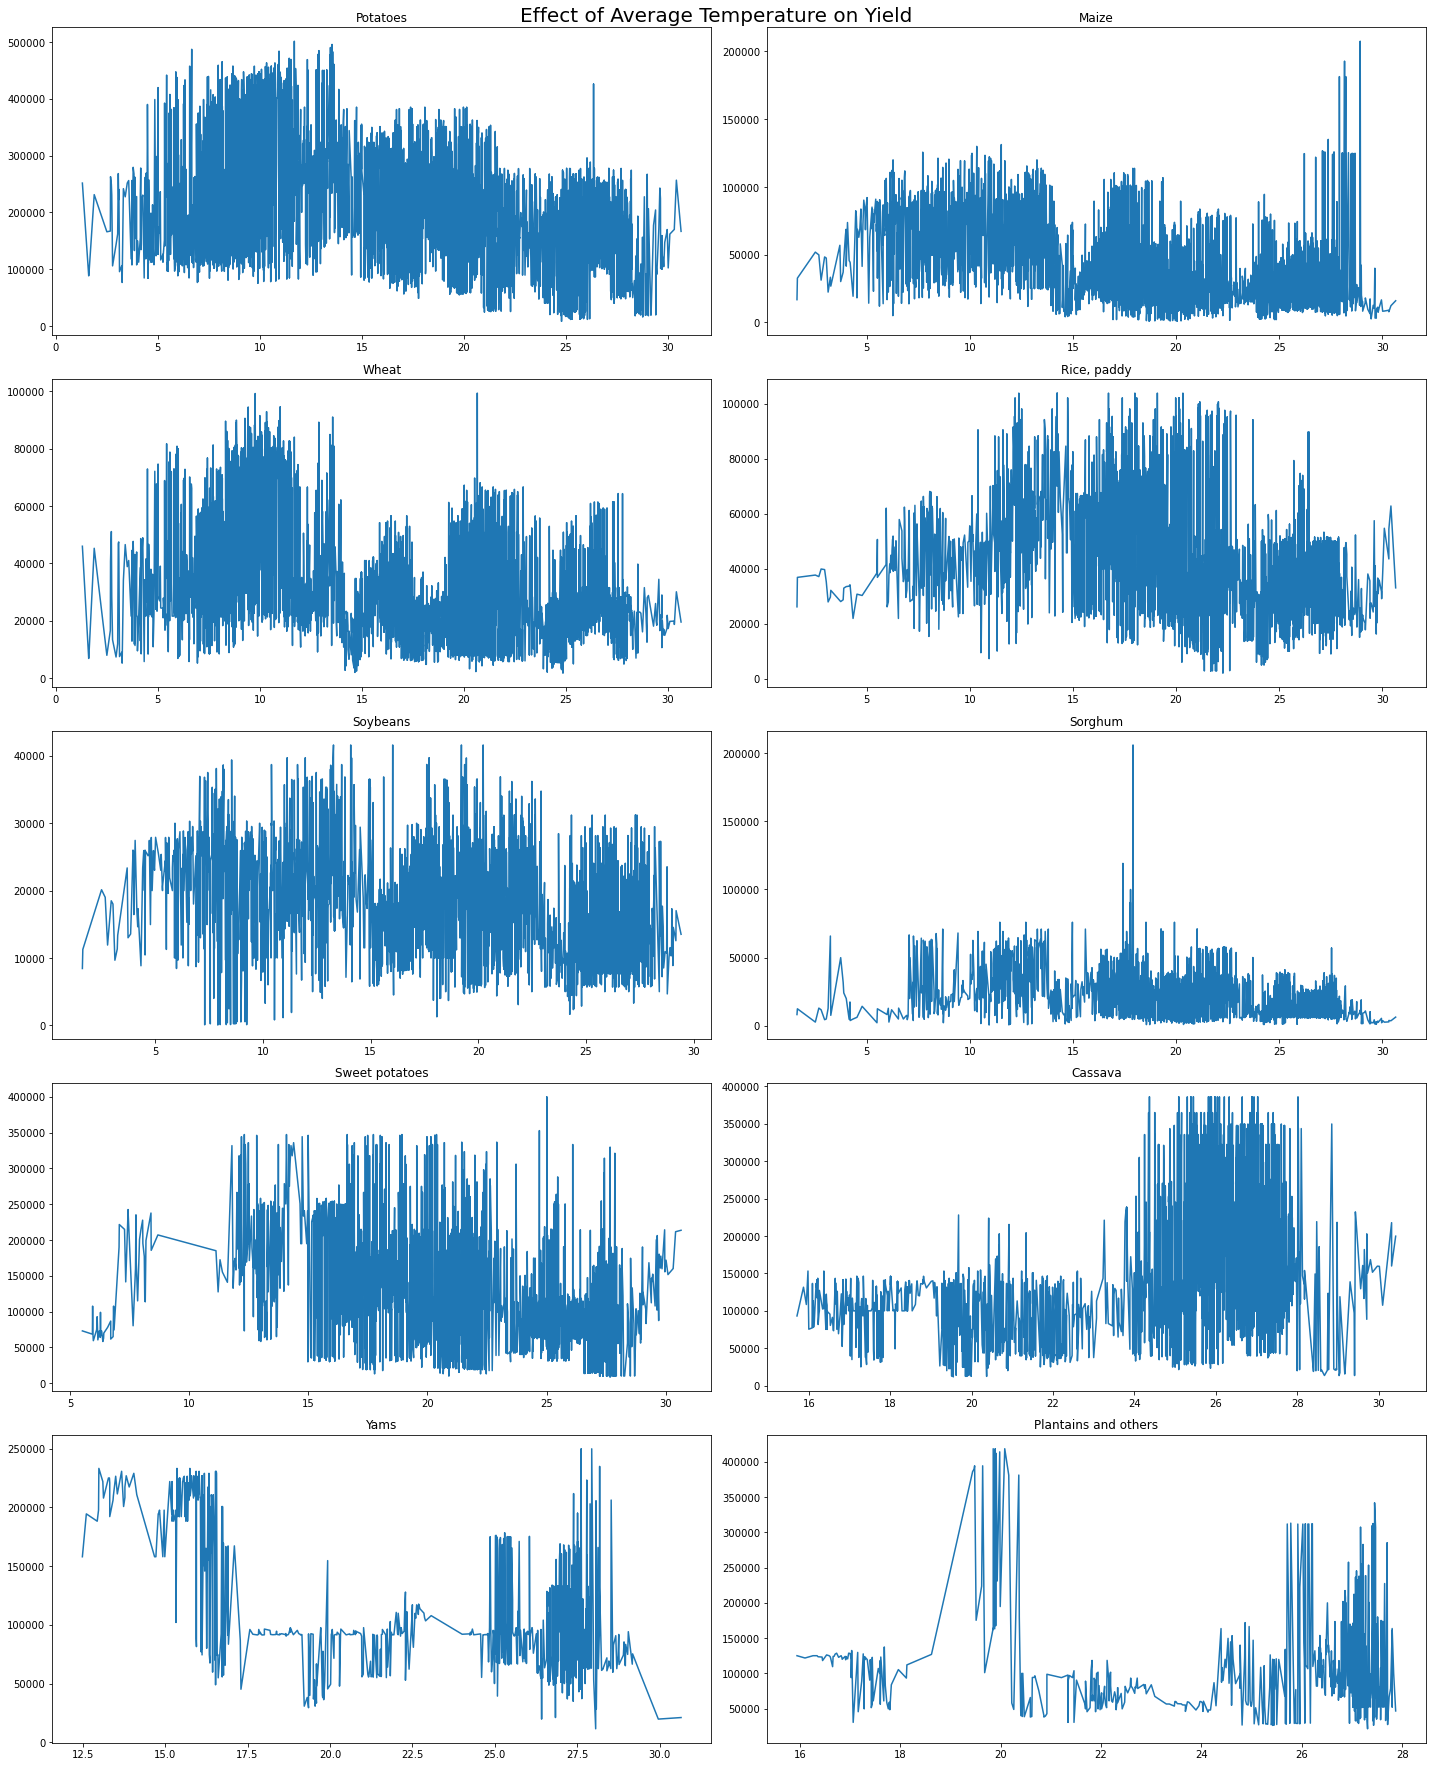

In [13]:

figure, axis = plt.subplots(5, 2, figsize=(20, 25))   
figure.suptitle('Effect of Average Temperature on Yield', fontsize = 20)

# Plotting and setting the title for the first subplot (row 0, column 0)
axis[0, 0].plot(df0["avg_temp"], df0["hg/ha_yield"])
axis[0, 0].set_title('Potatoes')

# Plotting and setting the title for the second subplot (row 0, column 1)
axis[0, 1].plot(df1["avg_temp"], df1["hg/ha_yield"])
axis[0, 1].set_title('Maize')

# Plotting and setting the title for the third subplot (row 1, column 0)
axis[1, 0].plot(df2["avg_temp"], df2["hg/ha_yield"])
axis[1, 0].set_title('Wheat')

# Plotting and setting the title for the fourth subplot (row 1, column 1)
axis[1, 1].plot(df3["avg_temp"], df3["hg/ha_yield"])
axis[1, 1].set_title('Rice, paddy')

# Plotting and setting the title for the fifth subplot (row 2, column 0)
axis[2, 0].plot(df4["avg_temp"], df4["hg/ha_yield"])
axis[2, 0].set_title('Soybeans')

# Plotting and setting the title for the sixth subplot (row 2, column 1)
axis[2, 1].plot(df5["avg_temp"], df5["hg/ha_yield"])
axis[2, 1].set_title('Sorghum')

# Plotting and setting the title for the seventh subplot (row 3, column 0)
axis[3, 0].plot(df6["avg_temp"], df6["hg/ha_yield"])
axis[3, 0].set_title('Sweet potatoes')

# Plotting and setting the title for the eighth subplot (row 3, column 1)
axis[3, 1].plot(df7["avg_temp"], df7["hg/ha_yield"])
axis[3, 1].set_title('Cassava')

# Plotting and setting the title for the ninth subplot (row 4, column 0)
axis[4, 0].plot(df8["avg_temp"], df8["hg/ha_yield"])
axis[4, 0].set_title('Yams')

# Plotting and setting the title for the tenth subplot (row 4, column 1)
axis[4, 1].plot(df9["avg_temp"], df9["hg/ha_yield"])
axis[4, 1].set_title('Plantains and others')

# Adjusting the layout of the subplots to avoid overlapping
plt.tight_layout()

# Displaying the figure with all the subplots
plt.show()


In [14]:
# Sorting DataFrame df0 by "pesticides_tonnes"
df0.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df1 by "pesticides_tonnes"
df1.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df2 by "pesticides_tonnes"
df2.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df3 by "pesticides_tonnes"
df3.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df4 by "pesticides_tonnes"
df4.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df5 by "pesticides_tonnes"
df5.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df6 by "pesticides_tonnes"
df6.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df7 by "pesticides_tonnes"
df7.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df8 by "pesticides_tonnes"
df8.sort_values("pesticides_tonnes", inplace=True)

# Sorting DataFrame df9 by "pesticides_tonnes"
df9.sort_values("pesticides_tonnes", inplace=True)


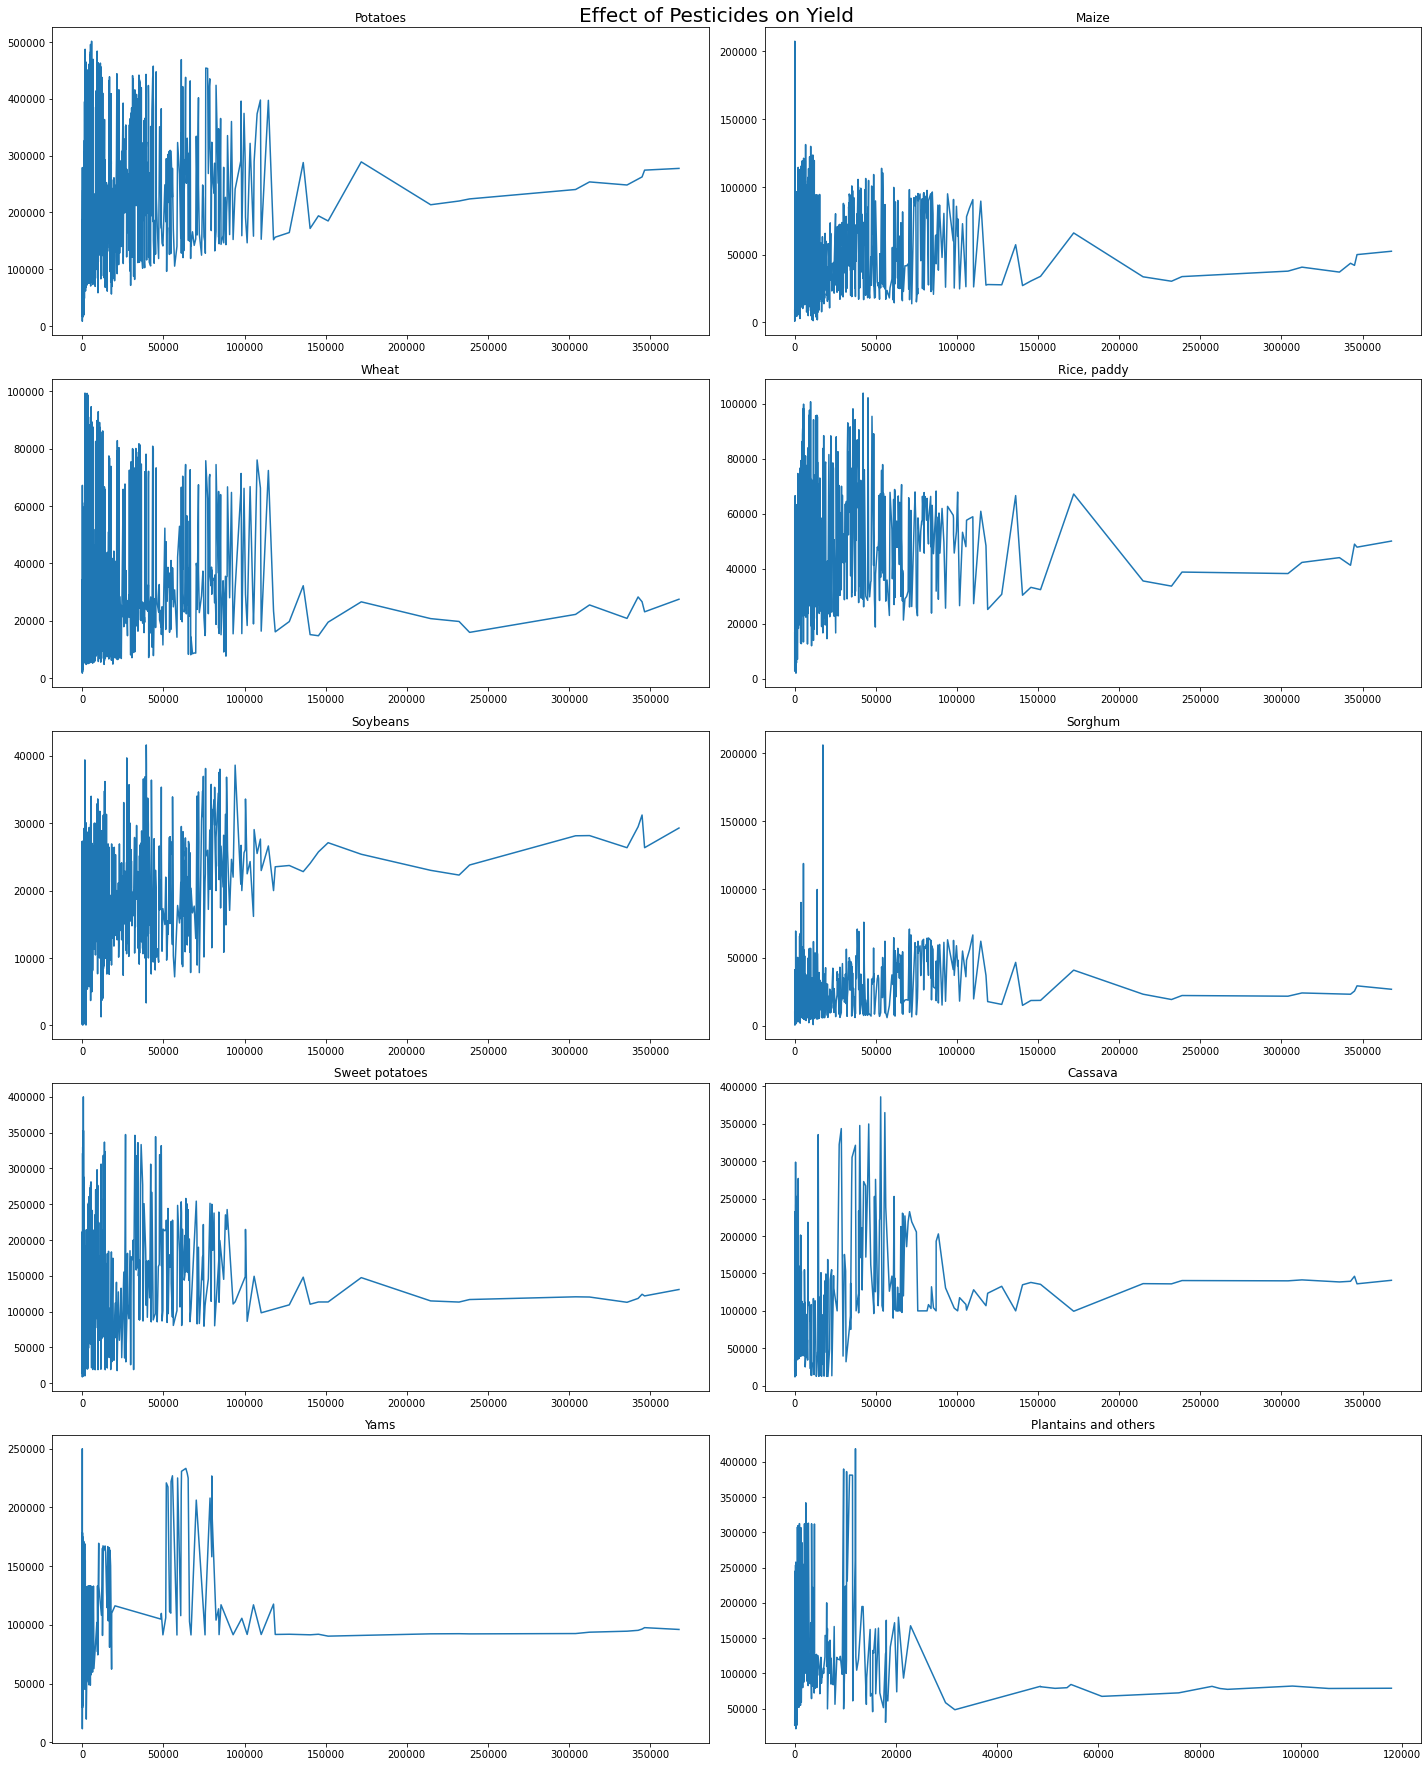

In [15]:
figure, axis = plt.subplots(5, 2, figsize=(20, 25))   
figure.suptitle('Effect of Pesticides on Yield', fontsize=20)
axis[0,0].plot(df0["pesticides_tonnes"], df0["hg/ha_yield"])
axis[0,0].set_title('Potatoes')
axis[0,1].plot(df1["pesticides_tonnes"], df1["hg/ha_yield"])
axis[0,1].set_title('Maize')
axis[1,0].plot(df2["pesticides_tonnes"], df2["hg/ha_yield"])
axis[1,0].set_title('Wheat')
axis[1,1].plot(df3["pesticides_tonnes"], df3["hg/ha_yield"])
axis[1,1].set_title('Rice, paddy')
axis[2,0].plot(df4["pesticides_tonnes"], df4["hg/ha_yield"])
axis[2,0].set_title('Soybeans')
axis[2,1].plot(df5["pesticides_tonnes"], df5["hg/ha_yield"])
axis[2,1].set_title('Sorghum')
axis[3,0].plot(df6["pesticides_tonnes"], df6["hg/ha_yield"])
axis[3,0].set_title('Sweet potatoes')
axis[3,1].plot(df7["pesticides_tonnes"], df7["hg/ha_yield"])
axis[3,1].set_title('Cassava')
axis[4,0].plot(df8["pesticides_tonnes"], df8["hg/ha_yield"])
axis[4,0].set_title('Yams')
axis[4,1].plot(df9["pesticides_tonnes"], df9["hg/ha_yield"])
axis[4,1].set_title('Plantains and others')
plt.tight_layout()
plt.show()

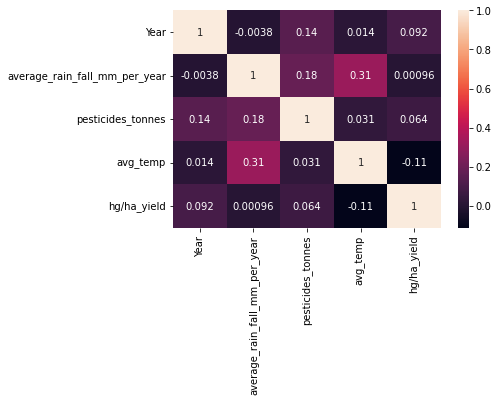

In [16]:
# Correlation Heatmap
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
# this heatmap displays the correlation between multiple variables

# A very weak negative correlation between year & avg_rainfall_per_year which implies that there is virtually no relationship between the year and the average annual rainfall.

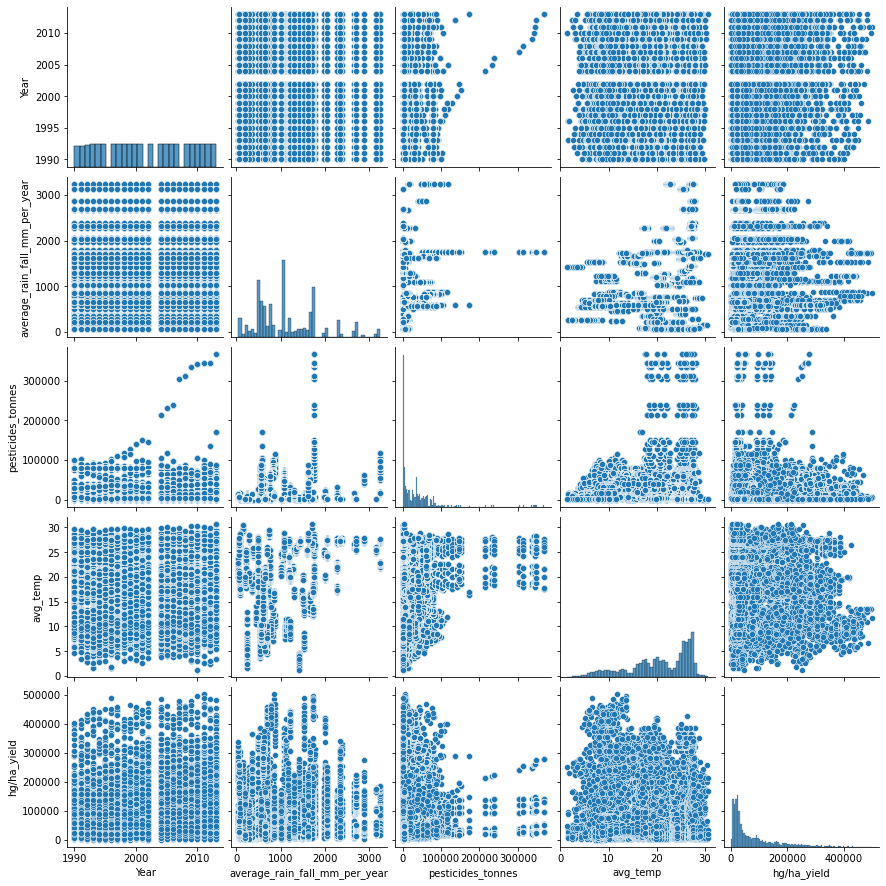

In [17]:
# Pair plot
sns.pairplot(df)
plt.show()


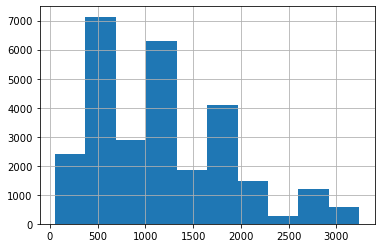

In [18]:
#Average rain fall 
df['average_rain_fall_mm_per_year'].hist()
plt.show()

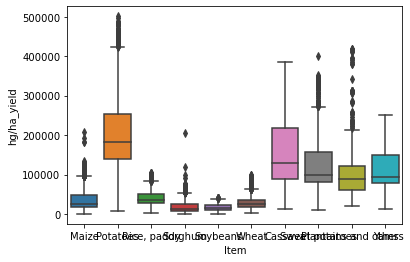

In [19]:
# Boxplot
sns.boxplot(x='Item', y='hg/ha_yield', data=df)
plt.show()


In [20]:
nice = r"C:\Users\HAMMAD\OneDrive\Desktop\climate-ds.csv"
demo = pd.read_csv(nice, index_col=['Unnamed: 0'])
demo.head()

# putting all countries into one df
area = demo['Area']
unique_areas = demo['Area'].unique()
# printing all countries in data
print(unique_areas)

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

In [21]:
demo = demo.replace([np.inf, -np.inf], np.nan)
demo = demo.dropna()
demo = demo.drop_duplicates()

# column representing the ratio of yield to average temperature
demo['yield_to_temp_ratio'] = demo['hg/ha_yield'] / demo['avg_temp']
# Similarly for rainfall
demo['yield_to_rain_ratio'] = demo['hg/ha_yield'] / demo['average_rain_fall_mm_per_year']

# demo['log_yield_to_temp_ratio'] = np.log(demo['yield_to_temp_ratio'])
# demo['log_yield_to_rain_ratio'] = np.log(demo['yield_to_rain_ratio'])


In [22]:
demo.head(10)

Area         Item  Year  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990                           1485   
1  Albania     Potatoes  1990                           1485   
2  Albania  Rice, paddy  1990                           1485   
3  Albania      Sorghum  1990                           1485   
4  Albania     Soybeans  1990                           1485   
5  Albania        Wheat  1990                           1485   
6  Albania        Maize  1991                           1485   
7  Albania     Potatoes  1991                           1485   
8  Albania  Rice, paddy  1991                           1485   
9  Albania      Sorghum  1991                           1485   

   pesticides_tonnes  avg_temp  hg/ha_yield  yield_to_temp_ratio  \
0             121.00     16.37        36613              2236.59   
1             121.00     16.37        66667              4072.51   
2             121.00     16.37        23333              1425.35   
3             121.00     16.37        12500               763.59   
4             121.00     16.37         7000               427.61   
5             121.00     16.37        30197              1844.65   
6             121.00     15.36        29068              1892.45   
7             121.00     15.36        77818              5066.28   
8             121.00     15.36        28538              1857.94   
9             121.00     15.36         6667               434.05   

   yield_to_rain_ratio  
0                24.66  
1                44.89  
2                15.71  
3                 8.42  
4                 4.71  
5                20.33  
6                19.57  
7                52.40  
8                19.22  
9                 4.49

In [23]:
demo['pesticides_tonnes'] = pd.to_numeric(demo['pesticides_tonnes'], errors='coerce')
print(demo['pesticides_tonnes'].dtype)


float64


In [24]:
import plotly.express as px


subset_data = demo[['Area', 'pesticides_tonnes']].dropna()

fig = px.choropleth(data_frame=subset_data,
                    locations='Area',
                    locationmode='country names',
                    color='pesticides_tonnes',
                    title='Effect of Pesticides on Yield',
                    color_continuous_scale='viridis')

fig.show()

In [25]:
import plotly.express as px

sample_size = 7000  # Desired sample size
sampled_data = demo.sample(n=sample_size, random_state=42)  # Randomly sample the data

# For temperature
fig = px.choropleth(sampled_data,  
                    locations="Area", 
                    color="yield_to_temp_ratio",
                    locationmode='country names', 
                    title="Yield to Average Temperature Ratio", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )

fig.show()

# For rainfall
fig = px.choropleth(sampled_data,  
                    locations="Area", 
                    color="yield_to_rain_ratio",
                    locationmode='country names', 
                    title="Yield to Rainfall Ratio", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    )

fig.show()

In [26]:
#droping years column 
data = df.drop(["Year"], axis=1)

In [27]:
#showing 10 rows of a dataframe
df.head(10)

Area         Item  Year  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990                           1485   
1  Albania     Potatoes  1990                           1485   
2  Albania  Rice, paddy  1990                           1485   
3  Albania      Sorghum  1990                           1485   
4  Albania     Soybeans  1990                           1485   
5  Albania        Wheat  1990                           1485   
6  Albania        Maize  1991                           1485   
7  Albania     Potatoes  1991                           1485   
8  Albania  Rice, paddy  1991                           1485   
9  Albania      Sorghum  1991                           1485   

   pesticides_tonnes  avg_temp  hg/ha_yield  
0             121.00     16.37        36613  
1             121.00     16.37        66667  
2             121.00     16.37        23333  
3             121.00     16.37        12500  
4             121.00     16.37         7000  
5             121.00     16.37        30197  
6             121.00     15.36        29068  
7             121.00     15.36        77818  
8             121.00     15.36        28538  
9             121.00     15.36         6667

In [28]:
data = pd.get_dummies(df, columns=['Area',"Item"])

In [29]:
data.head(15)

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0   1990                           1485             121.00     16.37   
1   1990                           1485             121.00     16.37   
2   1990                           1485             121.00     16.37   
3   1990                           1485             121.00     16.37   
4   1990                           1485             121.00     16.37   
5   1990                           1485             121.00     16.37   
6   1991                           1485             121.00     15.36   
7   1991                           1485             121.00     15.36   
8   1991                           1485             121.00     15.36   
9   1991                           1485             121.00     15.36   
10  1991                           1485             121.00     15.36   
11  1991                           1485             121.00     15.36   
12  1992                           1485             121.00     16.06   
13  1992                           1485             121.00     16.06   
14  1992                           1485             121.00     16.06   

    hg/ha_yield  Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  \
0         36613             1             0            0               0   
1         66667             1             0            0               0   
2         23333             1             0            0               0   
3         12500             1             0            0               0   
4          7000             1             0            0               0   
5         30197             1             0            0               0   
6         29068             1             0            0               0   
7         77818             1             0            0               0   
8         28538             1             0            0               0   
9          6667             1             0            0               0   
10         6066             1             0            0               0   
11        20698             1             0            0               0   
12        24876             1             0            0               0   
13        82920             1             0            0               0   
14        40000             1             0            0               0   

    Area_Armenia  ...  Item_Cassava  Item_Maize  Item_Plantains and others  \
0              0  ...             0           1                          0   
1              0  ...             0           0                          0   
2              0  ...             0           0                          0   
3              0  ...             0           0                          0   
4              0  ...             0           0                          0   
5              0  ...             0           0                          0   
6              0  ...             0           1                          0   
7              0  ...             0           0                          0   
8              0  ...             0           0                          0   
9              0  ...             0           0                          0   
10             0  ...             0           0                          0   
11             0  ...             0           0                          0   
12             0  ...             0           1                          0   
13             0  ...             0           0                          0   
14             0  ...             0           0                          0   

    Item_Potatoes  Item_Rice, paddy  Item_Sorghum  Item_Soybeans  \
0               0                 0             0              0   
1               1                 0             0              0   
2               0                 1             0              0   
3               0                 0             1              0   
4               0                 0          

In [30]:
#This line assigns to the variable X a subset of the DataFrame data. It selects all columns of data except the column named 'hg/ha_yield
X = data.loc[:, data.columns != 'hg/ha_yield']
Y = data['hg/ha_yield']

In [31]:
X.head(5)

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0  1990                           1485             121.00     16.37   
1  1990                           1485             121.00     16.37   
2  1990                           1485             121.00     16.37   
3  1990                           1485             121.00     16.37   
4  1990                           1485             121.00     16.37   

   Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  Area_Armenia  \
0             1             0            0               0             0   
1             1             0            0               0             0   
2             1             0            0               0             0   
3             1             0            0               0             0   
4             1             0            0               0             0   

   Area_Australia  ...  Item_Cassava  Item_Maize  Item_Plantains and others  \
0               0  ...             0           1                          0   
1               0  ...             0           0                          0   
2               0  ...             0           0                          0   
3               0  ...             0           0                          0   
4               0  ...             0           0                          0   

   Item_Potatoes  Item_Rice, paddy  Item_Sorghum  Item_Soybeans  \
0              0                 0             0              0   
1              1                 0             0              0   
2              0                 1             0              0   
3              0                 0             1              0   
4              0                 0             0              1   

   Item_Sweet potatoes  Item_Wheat  Item_Yams  
0                    0           0          0  
1                    0           0          0  
2                    0           0          0  
3                    0           0          0  
4                    0           0          0  

[5 rows x 115 columns]

In [32]:
Y.head(5)

0    36613
1    66667
2    23333
3    12500
4     7000
Name: hg/ha_yield, dtype: int64

In [33]:
#Mean Max
x_max = X.max()
X = X.divide(x_max)
#showing mean, amx and mean
X.describe()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
count 28242.00                       28242.00           28242.00  28242.00   
mean      0.99                           0.35               0.10      0.67   
std       0.00                           0.22               0.16      0.21   
min       0.99                           0.02               0.00      0.04   
25%       0.99                           0.18               0.00      0.54   
50%       0.99                           0.33               0.05      0.70   
75%       1.00                           0.51               0.13      0.85   
max       1.00                           1.00               1.00      1.00   

       Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  Area_Armenia  \
count      28242.00      28242.00     28242.00        28242.00      28242.00   
mean           0.00          0.00         0.01            0.01          0.00   
std            0.06          0.06         0.08            0.11          0.05   
min            0.00          0.00         0.00            0.00          0.00   
25%            0.00          0.00         0.00            0.00          0.00   
50%            0.00          0.00         0.00            0.00          0.00   
75%            0.00          0.00         0.00            0.00          0.00   
max            1.00          1.00         1.00            1.00          1.00   

       Area_Australia  ...  Item_Cassava  Item_Maize  \
count        28242.00  ...      28242.00    28242.00   
mean             0.03  ...          0.07        0.15   
std              0.18  ...          0.26        0.35   
min              0.00  ...          0.00        0.00   
25%              0.00  ...          0.00        0.00   
50%              0.00  ...          0.00        0.00   
75%              0.00  ...          0.00        0.00   
max              1.00  ...          1.00        1.00   

       Item_Plantains and others  Item_Potatoes  Item_Rice, paddy  \
count                   28242.00       28242.00          28242.00   
mean                        0.02           0.15              0.12   
std                         0.14           0.36              0.32   
min                         0.00           0.00              0.00   
25%                         0.00           0.00              0.00   
50%                         0.00           0.00              0.00   
75%                         0.00           0.00              0.00   
max                         1.00           1.00              1.00   

       Item_Sorghum  Item_Soybeans  Item_Sweet potatoes  Item_Wheat  Item_Yams  
count      28242.00       28242.00             28242.00    28242.00   28242.00  
mean           0.11           0.11                 0.10        0.14       0.03  
std            0.31           0.32                 0.30        0.34       0.17  
min            0.00           0.00                 0.00        0.00       0.00  
25%            0.00           0.00                 0.00        0.00       0.00  
50%            0.00           0.00                 0.00        0.00       0.00  
75%            0.00           0.00                 0.00        0.00       0.00  
max            1.00           1.00                 1.00        1.00       1.00  

[8 rows x 115 columns]

In [34]:
print(X.shape)
print(Y.shape)

(28242, 115)
(28242,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
print(x_train.shape)
print(y_train.shape)

(22593, 115)
(22593,)


In [37]:
#Model training

chosen_regressors = [
    'RandomForestRegressor',
    'BaggingRegressor',
    'XGBRegressor',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'DecisionTreeRegressor',
    'SGDRegressor',
    'LinearRegression'
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] in chosen_regressors))
]

In [38]:
reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None, regressors=REGRESSORS)
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 14%|████████████                                                                        | 1/7 [00:02<00:17,  2.99s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5231803640697361, 'Adjusted R-Squared': 0.513269961371023, 'RMSE': 58810.655737761896, 'Time taken': 2.9924447536468506}


 29%|████████████████████████                                                            | 2/7 [00:04<00:11,  2.26s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9852716183715093, 'Adjusted R-Squared': 0.9849654980231853, 'RMSE': 10336.094474935408, 'Time taken': 1.7307820320129395}


 43%|████████████████████████████████████                                                | 3/7 [00:05<00:05,  1.40s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9797397912979398, 'Adjusted R-Squared': 0.9793186953281698, 'RMSE': 12122.74341830327, 'Time taken': 0.36894965171813965}


 57%|████████████████████████████████████████████████                                    | 4/7 [00:09<00:08,  2.72s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8732412962861581, 'Adjusted R-Squared': 0.8706066946365844, 'RMSE': 30322.698695734725, 'Time taken': 4.73834753036499}


 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:10<00:03,  1.83s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.755108971667103, 'Adjusted R-Squared': 0.7500190623487797, 'RMSE': 42146.87637458691, 'Time taken': 0.2578747272491455}


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:25<00:06,  6.55s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9877770208302312, 'Adjusted R-Squared': 0.9875229737301908, 'RMSE': 9416.022589406939, 'Time taken': 15.721524953842163}


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:26<00:00,  3.75s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7479084188919225, 'Adjusted R-Squared': 0.7426688505153766, 'RMSE': 42762.01159878678, 'Time taken': 0.4011232852935791}


In [39]:
models

Adjusted R-Squared  R-Squared     RMSE  Time Taken
Model                                                                        
RandomForestRegressor                    0.99       0.99  9416.02       15.72
BaggingRegressor                         0.98       0.99 10336.09        1.73
DecisionTreeRegressor                    0.98       0.98 12122.74        0.37
GradientBoostingRegressor                0.87       0.87 30322.70        4.74
LinearRegression                         0.75       0.76 42146.88        0.26
SGDRegressor                             0.74       0.75 42762.01        0.40
AdaBoostRegressor                        0.51       0.52 58810.66        2.99

In [40]:
model_rfg = RandomForestRegressor(n_estimators = 100, random_state = 0)
#Model has trained
model_rfg.fit(x_train, y_train)
print('Model has been trained!')

Model has been trained!


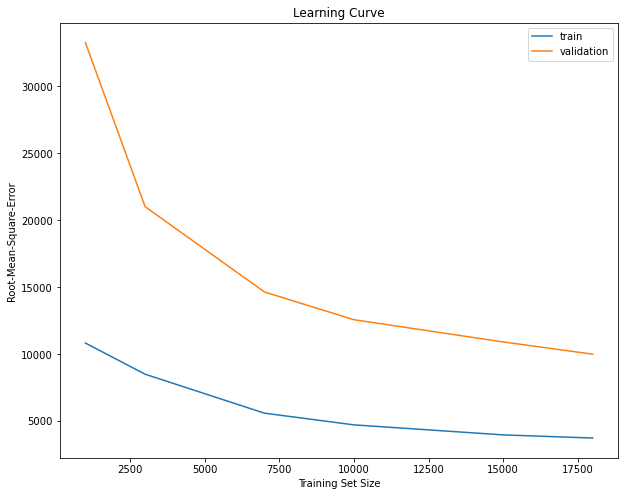

In [41]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_rfg,
    X=x_train,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1000, 3000, 7000, 10000, 15000, 18000]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Root-Mean-Square-Error")
plt.legend(loc="best")

plt.show()

In [42]:
print('Model score {}'.format(model_rfg.score(x_test, y_test)))

Model score 0.9879729737348775


In [43]:
y_test = pd.DataFrame(y_test)

In [44]:
y_test["yield_predicted"]= model_rfg.predict(x_test)

In [45]:
y_test.head(10)

hg/ha_yield  yield_predicted
25564        69220         71371.93
18113        20000         24440.93
25607        51206         48630.35
6815        166986        164207.17
18144        56319         57047.33
12680        26163         26212.95
3474         30708         30698.22
22381       109771        109938.30
20656       241650        238279.64
23170        47500         46125.05

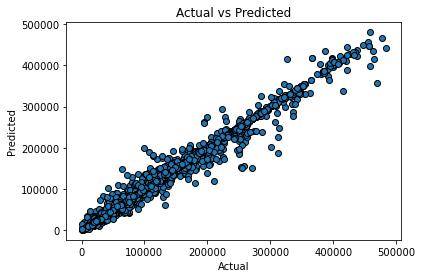

In [46]:
fig, ax = plt.subplots() 

ax.scatter(y_test["hg/ha_yield"], y_test["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [47]:
from sklearn import metrics

# Fetching the true values from the dataframe
y_true = y_test['hg/ha_yield']

print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print('R-squared:', metrics.r2_score(y_true, y_pred))


NameError: name 'y_pred' is not defined

# FINAL REPORT


## problem statement 
In the face of an escalating global population, ensuring food security has become an increasingly critical task. This highlights an urgent problem to resolve - understanding the influence of various climatic
elements, including average rainfall, temperature, and pesticide application, on crop yields.
As the global population continues to expand, ensuring food security becomes increasingly crucial. Thus, we are faced with a problem of understanding how changes in climatic conditions, specifically average rainfall, temperature, and the use of pesticides, affect crop yields.



## INTRODUCTION
Global warming has become one of the most common environmental issues discussed. This is due to the impacts global warming
has on crop yields, weather patterns, sea levels & ecological systems. Since 1850, when the record of global temperature began
to be kept, temperature is always on the increase and temperature is expected to increase by 1.8 to 8.5 0^C by the end of this
century. The objective of this study is to use data science techniques to quantitatively analyze the impact of climate change on
crop yields, and construct a predictive model to estimate future crop yields based on these climatic variables.
By comprehending the intricate relationship between these variables, we aim to contribute valuable insights that may assist in
agricultural decision-making, planning and strategizing against the backdrop of climate change.

This investigation will be conducted using a dataset comprising of several attributes including the area, item, year,
average rainfall, pesticides used, average temperature, and crop yield. The study will involve various steps such as
data preprocessing, exploratory data analysis, data modelling, and model evaluation.

With the world population excepting to hit a double by 2050, global food production would have to double to meet the need of
rising population. The threat to food security from climate change is a critical issue for a number of businesses like food and
beverages, retails, agriculture, insurance, biofuels, transportation and so on. Developing countries may be more at risk of food
scarcity. Governments across the globe need to be well equipped to deal with economic shocks that may arise as a result of
shortage in crop yield. By leveraging data science and machine learning, we aim to shed light on the potential implications of
climate change on agriculture, a sector that is fundamental to human survival and prosperity.



## QUESTIONS & ANSWERS

- Does the project clearly identify the problem?

Yes, the project clearly identifies the problem. The problem of how climate change influences crop yields is stated clearly in the problem statement and introduction.


- Does the project clearly describe the relevant data and their collection?

The project describes the data used, and the data was sourced from kaggle.


- Does the project clearly explain how the data can be used to draw conclusions about the underlying system?

Yes, the project does a good job of explaining how the data is used to draw conclusions. The report includes detailed descriptions of how the data was processed, explored, modeled, and evaluated to understand the relationships between climate variables and crop yield.


- Does the report clearly explain the work that was done?

Yes, the report provides clear explanations about the steps involved, including data preprocessing, exploratory data analysis, modeling, and evaluation. It is easy to follow the methodologies used.

- Is the project innovative or novel? 
#### Significance and Novelty

While there have been numerous studies on the impacts of climate change on agriculture, this project adds novelty by not only
investigating the effects of various climatic factors on crop yield but also developing a predictive model for future crop
yields using machine learning. The project shows some degree of novelty, particularly in the application of a range of machine learning models to predict crop yield based on climate variables. However, it's a common area of study. Altough, i have added unique aspects like the world plots using plotly which show effect of temperature/pesticides on yield in each respective area. Moreover, the application of a wide array of machine learning models and the comprehensive comparison of their performances add depth to this research, making it a robust and thorough investigation.

- Does the project use multiple techniques presented in the course (or clearly related to topics covered in the course) to understand and analyze the data for this problem?

Yes, the project utilizes multiple techniques, including data cleaning, exploratory data analysis, various regression models, and model evaluation techniques. These all relate to topics covered in the course.


- Does the report explain how this work fits around related work in this subject area?

While numerous studies have been conducted on the impact of climate change on agriculture, this project adds novelty by developing a predictive model for future crop yields using machine learning


- Does the report provide directions for further investigation?

Yes, the report provides clear directions for further investigation, suggesting the inclusion of more variables, application of more advanced predictive models, and understanding causative relationships.



## Methodology
Our investigation utilizes a dataset consisting of attributes such as area, item, year, average rainfall, pesticide usage,
average temperature, and crop yield. The process involved several phases including data preprocessing, EDA, data modeling, and
model evaluation. A wide array of techniques was applied in these steps, in alignment with the methodologies taught in our data
science course.

- How has climate changed over the past several decades?
My report mentions correlation between Year and various factors such as average rainfall and temperature. Simaltaneously, i have made plots which show effects of rainfall/temperature and pesticides on crop yield over time using line graph.

- Are certain crops or regions more vulnerable to the impacts of climate change on crop yields, and why?
Avg rainfall has same effect on potato and wheat AND maize and rice as can be seen in the first plots under the EDA heading. 
On the other hand, sweet potatoes and cassava also have a very similar pattern over the year i.e variation in yield of both crops is almost same (rainfall has same effect on both).
All in all, using pesticides almost has same impact on wheat, sorghum, cassava and yams; all of which see a decrease as pesticide consumption for these crops increase over time. Hence we can see an inverse relation whereas soybeans and potatoes see an increase in crop yeild as pesticides are increased. Using Pesticides has the harshest effect on 'Plantain and others' as its yeild decreases rapidly as pesticide is increased.
Over the course of the year, temperature has moderate effect on potatoes, wheat and soybeans whereas it maximizes yeild of crops such as sweet potatoes, cassava, rice and paddy as these crops prefer temperature around 30^C.  

(Models limitations:)
The model used is a Random Forest Regressor, which although is powerful and often works well, has its limitations. The model is sensitive to the type and range of the input features and may not perform well if the relationships in the data are highly non-linear or complex. The model is evaluated using the Root Mean Squared Error (RMSE), which provides a quantifiable measure of how well the model is fitting the data. However, RMSE alone may not be sufficient to evaluate the performance of a model fully, as it cannot discern between underfitting and overfitting. It also does not indicate whether the model is bias or variance error dominant.

- How can we predict the impact of future climate change on crop yields, and what solutions are most effective in addressing this challenge?
The machine learning model i developed, takes into account average rainfall, temperature & pesticide usage, can be used to predict future crop yields. By feeding this model with future climate data projections (such as those provided by climate models), you can generate predictions of crop yield under different climate scenarios.
It's essential to remember that predictions should be interpreted with caution due to the inherent uncertainty in both climate forecasts and the model's ability to accurately capture the relationship between climate variables and crop yields. 


The focus of this analysis is to investigate the relationship between various climate variables and crop yield, specifically aiming to understand how changes in climate factors might impact agriculture. The project analyzes real-world data and uses various advanced algorithms to answer practical questions derived from the data.
The dataset includes multiple attributes:
-Area
-Item
-Year
-Average Rainfall (mm per year)
-Pesticides Used (tonnes)
-Average Temperature (Celsius)
-Crop Yield (hectogram per hectare)



## Data Preprocessing
Before starting the analysis, we ensured the data is in the correct format and content. We checked for missing or erroneous data,
made sure numerical values are recognized as such, and categorical data is properly encoded.
We also performed deduplication to remove any identical rows in the dataset using df.drop_duplicates() and then removed
null rows. This step is vital to remove inconsistencies, handle missing data, and prepare the dataset for subsequent analysis
and modeling stages.



## Exploratory Data Analysis
We performed exploratory data analysis (EDA) to understand the data and establish a relationship between the dependent 
and independent variables. The correlation heatmap told us a lot: 
- Year and average_rain_fall_mm_per_year: -0.0038
This is a very weak negative correlation, which implies that there is virtually no relationship between the year and the average annual rainfall.
- Year and pesticides_tonnes: 0.14
This is a weak positive correlation, indicating that as the years progress, the amount of pesticides used tends to slightly increase. However, the correlation is quite weak, implying that other factors not included in this analysis may also significantly influence the amount of pesticides used.
- Year and avg_temp: 0.014
A very weak positive correlation, suggesting that there is virtually no relationship between the year and the average temperature.
- Year and hg/ha_yield: 0.092
This is also a weak positive correlation, indicating that as years pass, the yield (hg/ha) tends to slightly increase.

We divided the dataset based on the type of crop and performed the analysis for each of these types individually.
We visualized three relationships:
- Crop Yield vs. Average Rainfall
- Crop Yield vs. Average Temperature
- Crop Yield vs. Pesticides Used
- Scatterplot, boxplot 
Each of these relationships were plotted for every crop type.
The visualizations provided insight into how each variable impacts crop yield.



## Data Modelling
We split the dataset into training and testing sets, with an 80-20 split. We used several different regression algorithms to
train on this data, including:

- RandomForestRegressor
- BaggingRegressor
- XGBRegressor
- GradientBoostingRegressor
- AdaBoostRegressor
- DecisionTreeRegressor
- SGDRegressor
- LinearRegression

For predictive modeling, we utilized multiple regression models. The LazyRegressor function from the lazypredict library was
particularly helpful, allowing us to evaluate multiple models simultaneously and compare their performance based on metrics
like R-Squared and Root Mean Squared Error (RMSE).
These models were selected as they are all capable of handling multi-dimensional input and output.
The use of regression algorithms aligns with our goal, which is to predict a continuous value (crop yield)
based on several continuous and discrete variables. We implemented the LazyRegressor, which fits all the models on our training
dataset and provides the score for each model on our testing dataset. This allowed us to select the model with the best score,
which in this case was the RandomForestRegressor.
After the model was trained, we predicted the values for the test set and visualized the actual vs predicted yield for
comparison. This helped to visually inspect the model's performance.



## Model Evaluation
We used the Root-Mean-Square-Error (RMSE) to evaluate the model. The Root Mean Squared Error (RMSE) is a standard measure used
to quantify the amount of variance in the data that the model was not able to capture. In essence, it represents the standard
deviation of the residuals. 
In our model, the RMSE came out to be 9340.241073557998. This is an absolute measure of fit, meaning the interpretation of this
value heavily depends on the context and the range of our target variable, 'hg/ha_yield'.
A lower value of RMSE is preferable as it indicates a lesser amount of error in the prediction made by the model. But its also
important to note that this doesnt necessarily mean the model is 'good'. An RMSE value of zero would indicate a perfect fit to
the data. In practice, this is quite unlikely.\
However, our models RMSE value can be helpful when comparing with RMSE values from different models trained and tested on the
same dataset. A lower RMSE value indicates a better fit to the data, hence a more reliable model. That said, RMSE alone cannot
be the sole deciding factor of a models performance. It is always suggested to use it in conjunction with other metrics to gain
a comprehensive understanding of the models performance. We also plotted a learning curve for our selected model.
The learning curve helps us understand if our model is overfitting or underfitting and whether getting more training data would help.




## Conclusion
In this project, our primary objective was to examine the influence of climate change on crop yields. We discovered notable correlations between crop yield and climate-related variables such as average rainfall, average temperature, and pesticide usage. The predictive model we employed, a Random Forest Regressor, exhibited commendable performance, as demonstrated by the low Root Mean Squared Error (RMSE) and the steep learning curve.
However, it's crucial to underscore that our analysis currently establishes a correlative relationship between these variables, not a causative one. Unraveling the causative relationships may require more advanced analytical techniques and approaches.
As we move forward, our work can be enriched by including more climate factors into our analysis and leveraging more sophisticated prediction models. This can help us build a more robust and accurate model that can even better predict the yield of crops in response to varying climate parameters.
Ultimately, this project underscores the promising role of machine learning and data science in tackling critical global challenges. By gaining a deeper understanding of the relationships between climate change and agricultural yields, we are better equipped to address global food security issues. The insights generated from this study not only enhance our comprehension of the climate's impact on crop yield but also inform data-driven policy-making and strategic planning in the agricultural sector.